In [1]:
# Imports
import os
os.chdir("/projectnb/labci/Lucia/edu-bayesian-MCMC/")

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pymc as pm
from pymc import PolyaGamma as PG
import statsmodels.api as sm
from statsmodels.graphics import tsaplots

from src.samplers.MetropolisGibbs import gibbs
from src.samplers.PolyaGamma import polyagamma

In [2]:
# Simulate data
I = 100   # exam items
P = 1000  # pupils

init_a = torch.zeros(I)  
init_b = torch.zeros(I) 
init_t = torch.zeros(P) 
init_W = torch.zeros(P, I)


true_a = torch.empty(size=(I,))      # items' discriminatory power
true_b = torch.empty(size=(I,))      # items' difficulty
true_theta = torch.empty(size=(P,))  # students' skills
true_W = torch.empty(size=(P,I))     # latent variable (for PG case)
Y = torch.empty(size=(P, I))         # simulated data

# populate a, b:
for i in range(I):
    U = torch.distributions.Uniform(torch.tensor([0.0]), torch.tensor([1.0]))
    true_a[i] = U.sample()
    true_b[i] = -1.0*U.sample()
    
# populate theta:
for p in range(P):
    U = torch.distributions.Uniform(torch.tensor([0.0]), torch.tensor([1.0]))
    true_theta[p] = U.sample()

# populate W:
scales = torch.mul(torch.t(true_a[:, None]), true_theta[:, None]) + true_b
true_W = torch.from_numpy(pm.draw(PG.dist(h=1, z=scales)))

# generate exam data:
for i in range(I):
    for p in range(P):
        prob = torch.exp(true_a[i]*true_theta[p] + true_b[i]) / (1 + torch.exp(true_a[i]*true_theta[p] + true_b[i]))
        B = torch.distributions.Bernoulli(prob)
        Y[p][i] = B.sample()

In [3]:
# Run samplers
N = 10000
sigmasq_a, sigmasq_b, sigmasq_t = torch.tensor([1.0]), torch.tensor([1.0]), torch.tensor([1.0])  # priors

samples_mwg = gibbs(init_a, init_b, init_t, Y, sigmasq_a, sigmasq_b, sigmasq_t, niter=N, adapt=False)
print("")
samples_ada_mwg = gibbs(init_a, init_b, init_t, Y, sigmasq_a, sigmasq_b, sigmasq_t, niter=N, adapt=True)
print("")
samples_pg = polyagamma(init_a, init_b, init_t, init_W, Y, sigmasq_a, sigmasq_b, sigmasq_t, niter=N)

Starting Gibbs sampler... 
--------------------------------------------



100%|██████████| 9999/9999 [32:57:23<00:00, 11.87s/it]   


Done sampling.
Average acceptance rates:
 tensor([0.0827, 0.0876, 0.0883, 0.0934, 0.0885, 0.0882, 0.0849, 0.0817, 0.0857,
        0.0874, 0.0910, 0.0972, 0.0898, 0.0870, 0.0870, 0.0910, 0.0823, 0.0850,
        0.0920, 0.0909, 0.0864, 0.0856, 0.0840, 0.0874, 0.0854, 0.0928, 0.0887,
        0.0900, 0.0834, 0.0849, 0.0920, 0.0883, 0.0900, 0.0830, 0.0907, 0.0824,
        0.0890, 0.0957, 0.0798, 0.0807, 0.0941, 0.0840, 0.0868, 0.0848, 0.0901,
        0.0884, 0.0873, 0.0840, 0.0875, 0.0867, 0.0839, 0.0910, 0.0906, 0.0843,
        0.0823, 0.0880, 0.0943, 0.0934, 0.0850, 0.0866, 0.0847, 0.0928, 0.0808,
        0.0877, 0.0899, 0.0830, 0.0861, 0.0834, 0.0844, 0.0914, 0.0863, 0.0859,
        0.0927, 0.0875, 0.0890, 0.0830, 0.0888, 0.0891, 0.0849, 0.0805, 0.0877,
        0.0856, 0.0878, 0.0919, 0.0865, 0.0858, 0.0819, 0.0912, 0.0869, 0.0840,
        0.0875, 0.0857, 0.0867, 0.0862, 0.0914, 0.0840, 0.0868, 0.0847, 0.0858,
        0.0847]) 
 tensor([0.0818, 0.0808, 0.0781, 0.0890, 0.0821, 0.0770, 0.0

 42%|████▏     | 4161/9999 [13:45:05<19:17:41, 11.90s/it]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

100%|██████████| 9999/9999 [33:03:22<00:00, 11.90s/it]   


Done sampling.
Average acceptance rates:
 tensor([0.2986, 0.2986, 0.2986, 0.2973, 0.2998, 0.2995, 0.2983, 0.2989, 0.2988,
        0.2995, 0.2973, 0.2979, 0.2969, 0.2975, 0.2989, 0.2989, 0.2981, 0.2993,
        0.2983, 0.3003, 0.2969, 0.2991, 0.2961, 0.2984, 0.2978, 0.2994, 0.2995,
        0.2972, 0.2981, 0.2993, 0.2971, 0.2981, 0.2998, 0.2985, 0.3005, 0.2976,
        0.2999, 0.2979, 0.2986, 0.2992, 0.3014, 0.2975, 0.2983, 0.2992, 0.2983,
        0.2977, 0.2984, 0.3012, 0.2972, 0.2991, 0.2980, 0.2986, 0.2990, 0.2987,
        0.2983, 0.2975, 0.2992, 0.2980, 0.2983, 0.2971, 0.3006, 0.2979, 0.2994,
        0.2968, 0.2984, 0.2973, 0.2971, 0.2975, 0.3002, 0.2974, 0.2996, 0.2983,
        0.3001, 0.2998, 0.2985, 0.2969, 0.2983, 0.2975, 0.2980, 0.3001, 0.2980,
        0.2988, 0.2977, 0.2985, 0.2986, 0.2988, 0.2978, 0.2990, 0.2981, 0.2989,
        0.2978, 0.2983, 0.2996, 0.2969, 0.2995, 0.2989, 0.2987, 0.2991, 0.2951,
        0.2993]) 
 tensor([0.2995, 0.2997, 0.2979, 0.2970, 0.2995, 0.2998, 0.2

100%|██████████| 9999/9999 [28:31<00:00,  5.84it/s]


### Plots

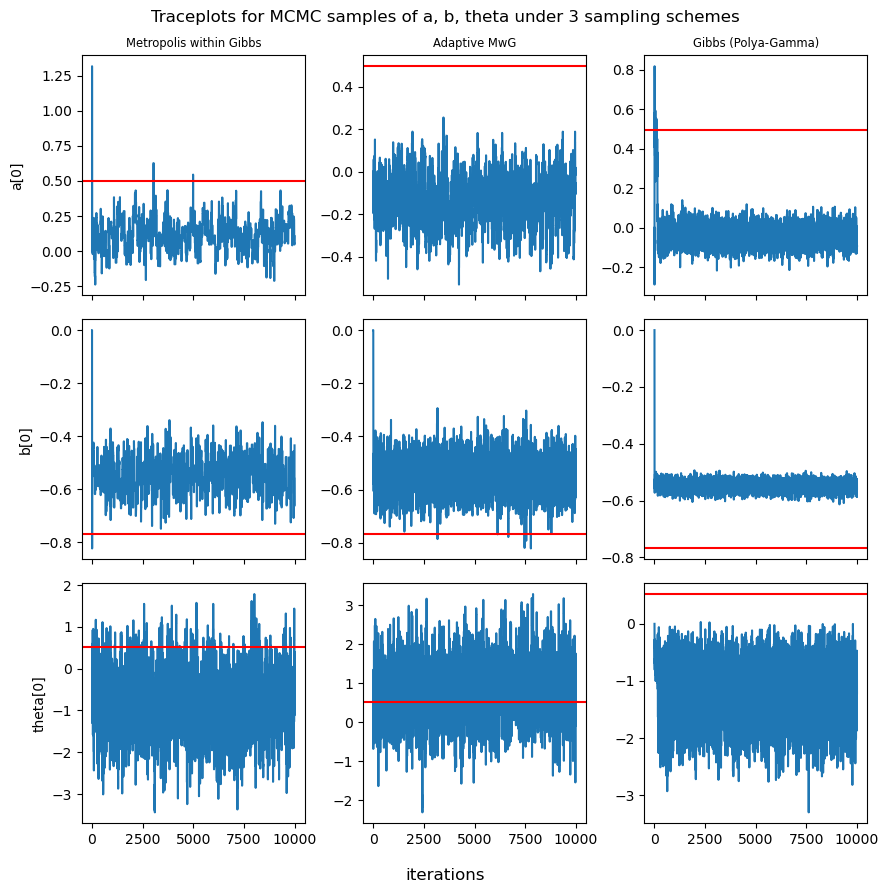

In [12]:
fig1, axs = plt.subplots(nrows=3, ncols=3, figsize=(9,9), sharex=True)
fig1.suptitle("Traceplots for MCMC samples of a, b, theta under 3 sampling schemes")

t = range(N)
data_to_plot = [samples_mwg[0][:,0], samples_ada_mwg[0][:,0], samples_pg[0][:,0],
                samples_mwg[1][:,0], samples_ada_mwg[1][:,0], samples_pg[1][:,0],
                samples_mwg[2][:,0], samples_ada_mwg[2][:,0], samples_pg[2][:,0]]

true_values = [true_a[0], true_a[0], true_a[0],
               true_b[0], true_b[0], true_b[0],
               true_theta[0], true_theta[0], true_theta[0]]

cols = ["Metropolis within Gibbs", "Adaptive MwG", "Gibbs (Polya-Gamma)"]
rows = ["a[0]", "b[0]", "theta[0]"]

for i, ax in enumerate(fig1.axes):
    ax.plot(t, data_to_plot[i])
    ax.axhline(true_values[i], color="red")

for ax, col in zip(axs[0], cols):
    ax.set_title(col, size="small")

for ax, row in zip(axs[:,0], rows):
    ax.set_ylabel(row, rotation=90)

fig1.supxlabel('iterations')
fig1.tight_layout()
plt.show()

fig1.savefig("/projectnb/labci/Lucia/edu-bayesian-MCMC/src/run/figures/fig1_traceplots.png")

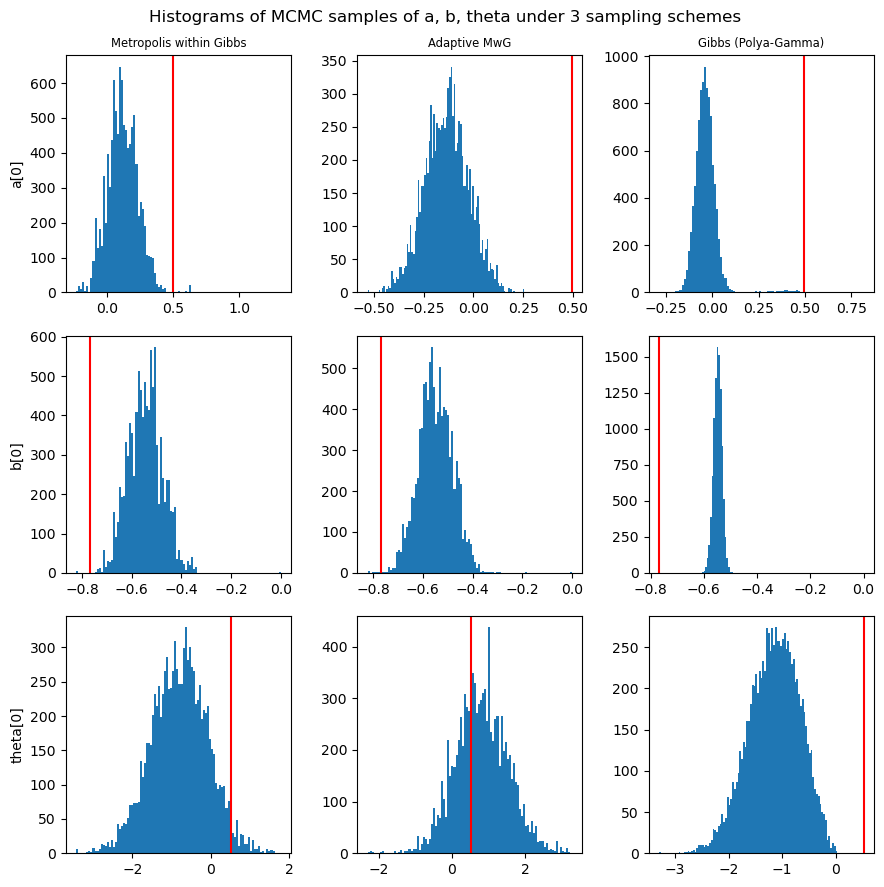

In [13]:
fig2, axs = plt.subplots(nrows=3, ncols=3, figsize=(9,9))
fig2.suptitle("Histograms of MCMC samples of a, b, theta under 3 sampling schemes")

cols = ["Metropolis within Gibbs", "Adaptive MwG", "Gibbs (Polya-Gamma)"]
rows = ["a[0]", "b[0]", "theta[0]"]

for i, ax in enumerate(fig2.axes):
    ax.hist(data_to_plot[i], bins=100)
    ax.axvline(true_values[i], color="red")

for ax, col in zip(axs[0], cols):
    ax.set_title(col, size="small")

for ax, row in zip(axs[:,0], rows):
    ax.set_ylabel(row, rotation=90)

fig2.tight_layout()
plt.show()

fig2.savefig("/projectnb/labci/Lucia/edu-bayesian-MCMC/src/run/figures/fig2_histograms.png")

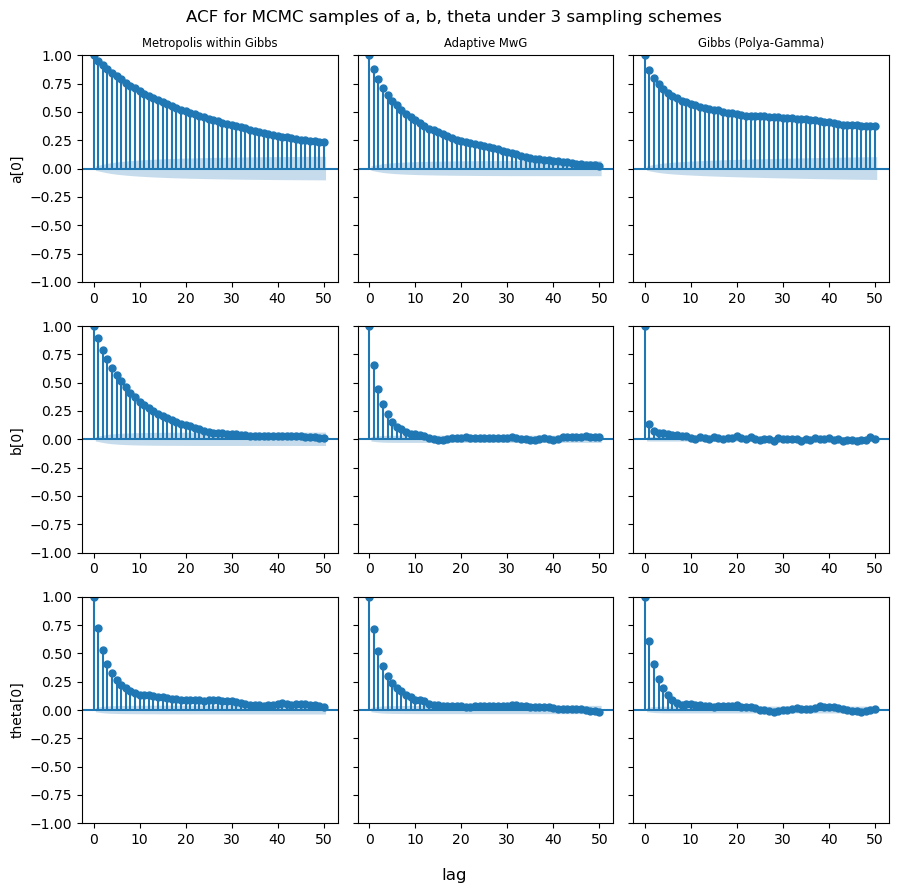

In [14]:
fig3, axs = plt.subplots(nrows=3, ncols=3, figsize=(9,9), sharey=True)
fig3.suptitle("ACF for MCMC samples of a, b, theta under 3 sampling schemes")

cols = ["Metropolis within Gibbs", "Adaptive MwG", "Gibbs (Polya-Gamma)"]
rows = ["a[0]", "b[0]", "theta[0]"]

for i, ax in enumerate(fig3.axes):
    tsaplots.plot_acf(data_to_plot[i], lags=50, ax=ax, title="")

for ax, col in zip(axs[0], cols):
    ax.set_title(col, size="small")

for ax, row in zip(axs[:,0], rows):
    ax.set_ylabel(row, rotation=90)

fig3.supxlabel('lag')
fig3.tight_layout()
plt.show()

fig3.savefig("/projectnb/labci/Lucia/edu-bayesian-MCMC/src/run/figures/fig3_acf.png")

### Accuracy

In [7]:
def mse(chain, true_val):
    MSE = nn.MSELoss()
    E = torch.empty(size=(len(chain),))

    for s in range(len(chain)):
        E[s] = MSE(chain[s], true_val)

    return E

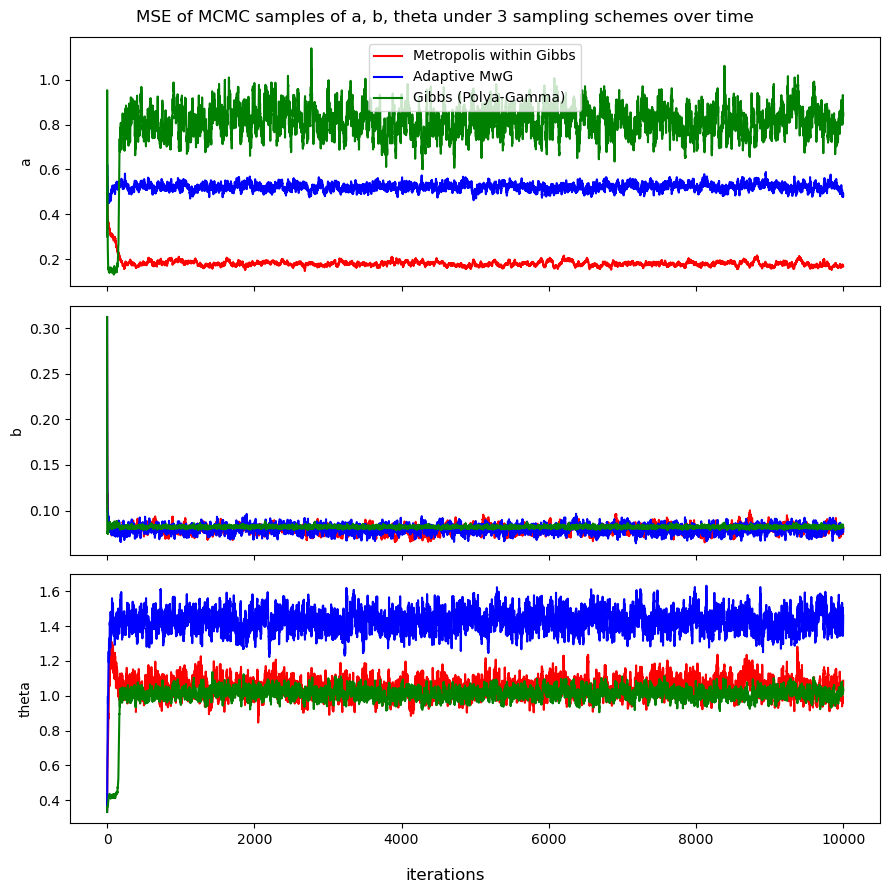

In [15]:
fig4, axs = plt.subplots(nrows=3, ncols=1, figsize=(9,9), sharex=True)
fig4.suptitle("MSE of MCMC samples of a, b, theta under 3 sampling schemes over time")

t = range(N)
errors_to_plot = [[mse(samples_mwg[0], true_a), mse(samples_ada_mwg[0], true_a), mse(samples_pg[0], true_a)],
                  [mse(samples_mwg[1], true_b), mse(samples_ada_mwg[1], true_b), mse(samples_pg[1], true_b)],
                  [mse(samples_mwg[2], true_theta), mse(samples_ada_mwg[2], true_theta), mse(samples_pg[2], true_theta)]]

colors = ["red", "blue", "green"]
labels = ["Metropolis within Gibbs", "Adaptive MwG", "Gibbs (Polya-Gamma)"]
rows = ["a", "b", "theta"]

for i, ax in enumerate(fig4.axes):
    lines = errors_to_plot[i]
    
    for j in range(len(lines)):
        ax.plot(t, lines[j], color=colors[j], label=labels[j])

for ax, row in zip(axs, rows):
    ax.set_ylabel(row, rotation=90)

axs[0].legend(loc="best")
fig4.supxlabel('iterations')
fig4.tight_layout()
plt.show()

fig4.savefig("/projectnb/labci/Lucia/edu-bayesian-MCMC/src/run/figures/fig4_mse.png")

In [19]:

for i in range(len(errors_to_plot)):
    for j in range(len(errors_to_plot[i])):
        mean = torch.mean(errors_to_plot[i][j])
        print(f"Overall MSE for variable {rows[i]} under {labels[j]} scheme: {mean:.3f}")

Overall MSE for variable a under Metropolis within Gibbs scheme: 0.183
Overall MSE for variable a under Adaptive MwG scheme: 0.522
Overall MSE for variable a under Gibbs (Polya-Gamma) scheme: 0.805
Overall MSE for variable b under Metropolis within Gibbs scheme: 0.079
Overall MSE for variable b under Adaptive MwG scheme: 0.079
Overall MSE for variable b under Gibbs (Polya-Gamma) scheme: 0.082
Overall MSE for variable theta under Metropolis within Gibbs scheme: 1.049
Overall MSE for variable theta under Adaptive MwG scheme: 1.429
Overall MSE for variable theta under Gibbs (Polya-Gamma) scheme: 1.004
